# Source extraction (à la sextractor)

The source extraction is based on [sep](https://github.com/kbarbary/sep).

This can run on any image, see from `sep.extract` for a detailed documentation.

In the following example we show how to extract source from a quadrant science image efficiently.

In [1]:
import ztfimg

Load an image

In [2]:
qimg = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits",
                                   as_path=False)

get an background-subtracted data

In [3]:
data = qimg.get_data(rm_bkgd=True)

In [4]:
mask= qimg.get_mask() # where nan s are
noise= qimg.get_noise("rms") # noise estimation (use rms or globalrms)

In [5]:
noise

array([[6.32081  , 6.321727 , 6.322654 , ..., 5.8277016, 5.828612 ,
        5.8295255],
       [6.32104  , 6.32195  , 6.3228726, ..., 5.8274574, 5.8283606,
        5.8292656],
       [6.3212643, 6.3221693, 6.3230867, ..., 5.827159 , 5.8280544,
        5.828951 ],
       ...,
       [7.1661277, 7.1548386, 7.143451 , ..., 5.477454 , 5.476903 ,
        5.476351 ],
       [7.204712 , 7.1930127, 7.1812115, ..., 5.476767 , 5.4762306,
        5.475693 ],
       [7.243643 , 7.23153  , 7.219311 , ..., 5.476151 , 5.4756308,
        5.4751096]], dtype=float32)

and simply use extract_source

In [6]:
sources = ztfimg.extract_sources(data, thresh_=5, err=noise, mask=mask)

Source is a simple dataframe.

`a` and `b` are the first moment of the ellipse (1 sigma radius basically)

In [7]:
sources

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
0,29.102404,215,127,2109,2308,0,5,2226.705298,1.970933,1862.166376,...,-0.014807,5562.125488,8042.915039,294.469360,690.466919,2227,2,2227,2,3
1,31.117994,162,90,2310,2422,0,5,2380.202267,0.549769,48.400947,...,-0.012548,47710.652344,61063.718750,9850.387695,29367.927734,2381,0,2381,0,2
2,28.926733,105,55,2665,2751,0,5,2713.379236,1.341402,345.164648,...,-0.017554,2384.816162,3746.399414,164.740540,365.204926,2719,3,2719,3,2
3,29.160757,14,5,1888,1891,3,6,1889.625189,4.852795,0.806323,...,-0.026809,502.018097,558.230225,80.947922,175.126770,1890,5,1890,5,0
4,30.850006,17,9,2415,2419,3,6,2416.503380,4.563930,0.894091,...,-0.001680,1317.361084,1401.672485,173.193588,319.248108,2416,5,2416,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,0.000000,34,34,1609,1615,3074,3079,1612.159959,3077.581186,1.227468,...,-0.075056,5923.121094,6138.124023,836.588562,1979.512573,1612,3078,1612,3078,2
7516,0.000000,26,26,2131,2136,3075,3079,2133.294449,3077.002890,1.230237,...,0.047404,1607.031250,1666.958740,222.230591,534.868408,2133,3077,2133,3077,2
7517,0.000000,9,9,2183,2186,3077,3079,2184.267217,3078.520657,0.822051,...,-0.025992,343.920166,472.822266,75.431488,202.524933,2184,3079,2184,3079,2
7518,0.000000,43,43,2228,2235,3074,3079,2231.490522,3077.781102,1.336943,...,-0.062746,8165.163574,8685.173828,1089.604492,2188.315918,2232,3078,2232,3078,2


## Plotting

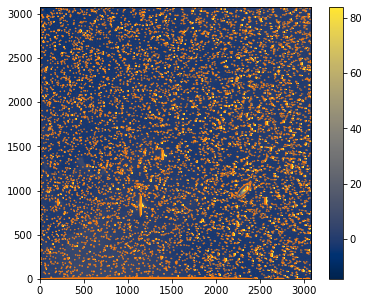

In [9]:
%matplotlib inline
from matplotlib.patches import Ellipse

fig = qimg.show(data=data) # show extactly the data used.
ax = fig.axes[0] # the main panel

moment_scale = 2*3 # 2 because Ellipse expects diameter, 3 to get the 3sigma contour
ellipses = [Ellipse([x,y], 
                    width=a*moment_scale, height=b*moment_scale, 
                    angle=t*180/3.14, 
                    facecolor="None", edgecolor="C1")  # just show edges
            for x,y,a,b,t in  sources[["x","y","a","b","theta"]].values]

_ = [ax.add_patch(e_) for e_ in ellipses]

(2000.0, 2300.0)

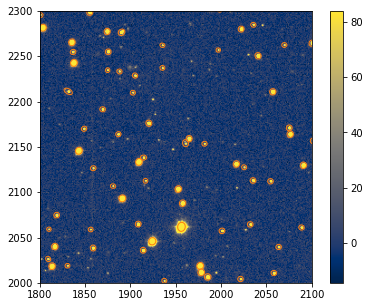

In [56]:
%matplotlib inline
from matplotlib.patches import Ellipse

fig = qimg.show(data=data) # show extactly the data used.
ax = fig.axes[0] # the main panel

moment_scale = 2*3 # 2 because Ellipse expects diameter, 3 to get the 3sigma contour
ellipses = [Ellipse([x,y],
                    width=a*moment_scale, height=b*moment_scale, 
                    angle=t*180/3.14, 
                    facecolor="None", edgecolor="C1")  # just show edges
            for x,y,a,b,t in  sources[["x","y","a","b","theta"]].values]

_ = [ax.add_patch(e_) for e_ in ellipses]

ax.set_xlim(1800, 2100)
ax.set_ylim(2000, 2300)